<a href="https://colab.research.google.com/github/mitsu666/Lecture2021/blob/main/Lecture04_PrincpalComponentAnalysis_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主成分分析演習

* データ:wineの特徴と品質のデータ

  このデータは、イタリアの同じ地域で3つの異なる栽培者によって栽培されたワインの化学分析の結果です。3種類のワインに含まれる異なる成分について13種類の測定が行われています。


* データ内容:
  * レコード数 178 
  * カラム数 13 
* 特徴量:
  * Alcohol アルコール
  * Malic acid リンゴ酸
  * Ash 灰分
  * Alcalinity of ash アルカリ灰
  * Magnesium マグネシウム
  * Total phenols フェノール
  * Flavanoids フラバノイド
  * Nonflavanoid phenols ノンフラバノイドフェノール
  * Proanthocyanins プロアントシアニン
  * Color intensity 色の強度
  * Hue 色相
  * OD280/OD315 of diluted wines 希釈ワインのOD280/OD315
  * Proline プロリン

* クラス
  1/2/3いずれかの種類であることを示す変数

* 参考)
  * Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
  * https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

* 問題
3種類のワインの13個の特徴を2次元に圧縮して散布図で可視化したい。

## 00. 事前準備

In [ ]:
#ライブラリ読込
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #主成分分析用のライブラリ

In [ ]:
#データセットをsklearn標準ライブラリから読み込む
from sklearn.datasets import load_wine
wine = load_wine()


df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [ ]:
#データ確認
print (df.head())
print (df.shape)

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
(178, 13)


In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## 01. データクリーニング

In [ ]:
#概要
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
#一応欠損確認
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


* 欠損なし
* 全部数値

　→主成分分析実行可能


## 02. 主成分分析実行

In [ ]:
#PCAクラスのインスタンス化
pca = PCA()
#PCA実行
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)





## 03. 係数や寄与度の確認

* 係数

 第一主成分 = a11x11+...a1nx1n　におけるaijの大きさである。これが大きい変数xiは第一主成分との相関が強い

* 寄与度
  全体のばらつきに対して主成分が持つバラツキの比率である

  第i主成分の寄与度:=第i主成分のバラツキ/全体のバラツキ 

* 累積寄与度

Text(0.5, 1.0, 'The 2nd loads')

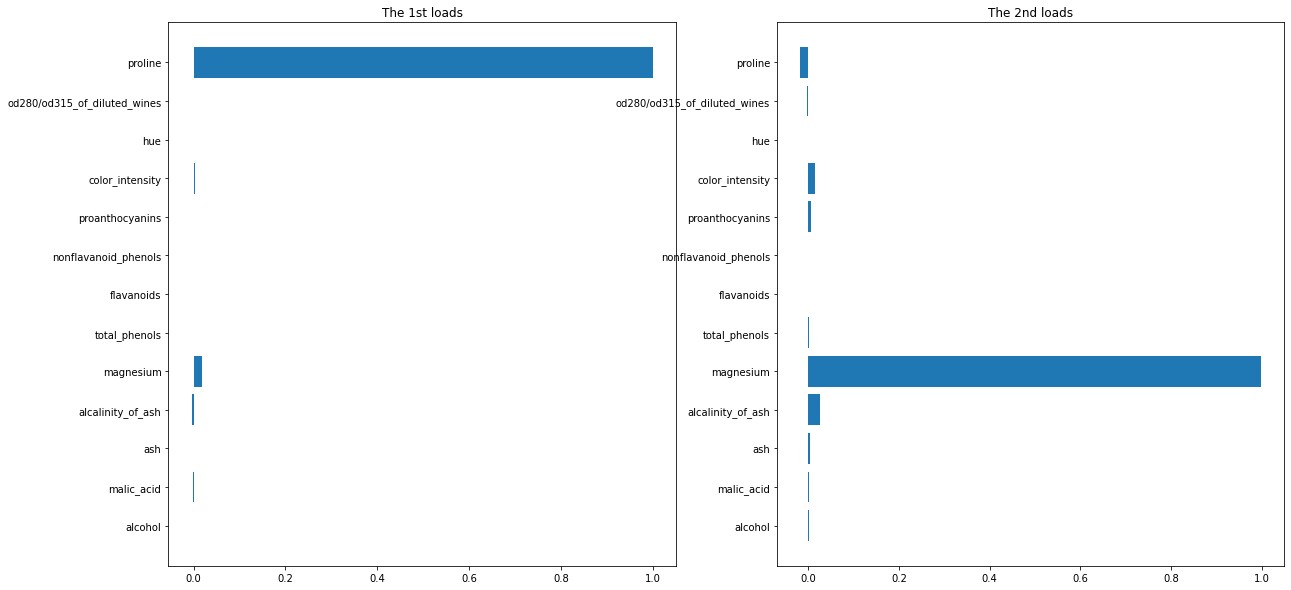

In [ ]:
#重み係数
#可視化のために第2主成分次元まで圧縮する
loadings = pd.DataFrame(pca.components_.T, columns=["PC{0:02}".format(x + 1) for x in range(len(df.columns))], index=df.columns)
loadings
#第1主成分の重み係数
compo_1 = loadings['PC01']
#第2主成分の重み係数
compo_2 = loadings['PC02']

#図示する
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.barh(compo_1.index,compo_1)
plt.title('The 1st loads')
plt.subplot(1,2,2)
plt.barh(compo_2.index,compo_2)
plt.title('The 2nd loads')

Text(0.5, 1.0, 'The 2nd loads')

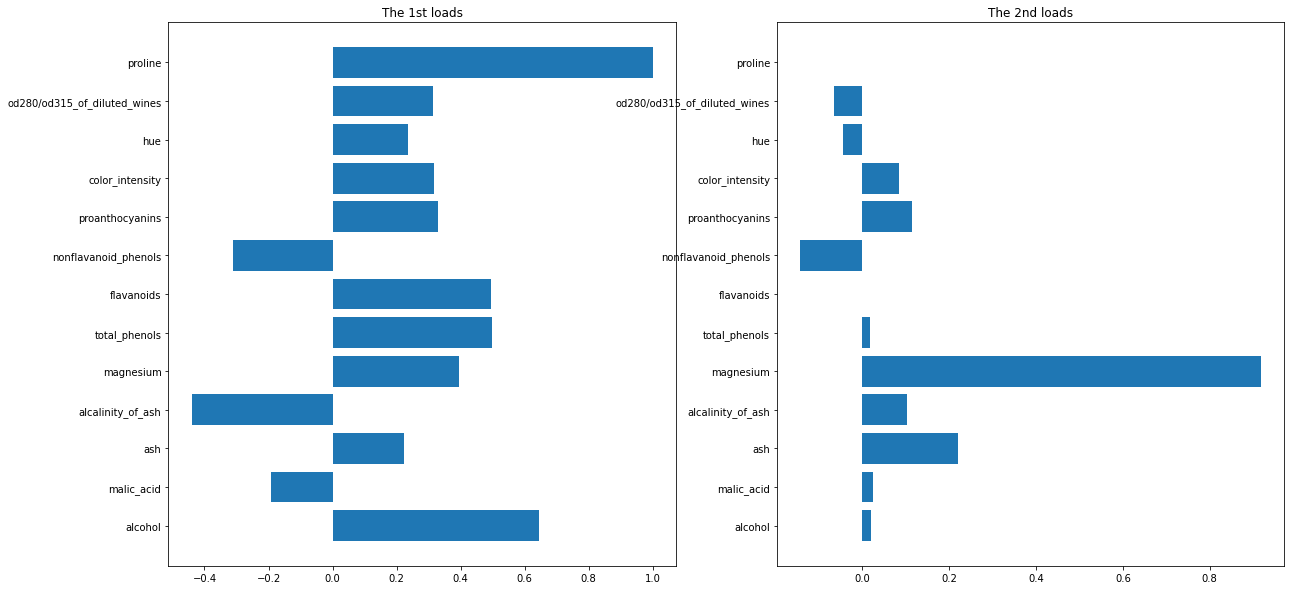

In [ ]:
#因子負荷量
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=["PC{0:02}".format(x + 1) for x in range(len(df.columns))], index=df.columns)
loading_matrix

#第1主成分の重み係数
compo_1 = loading_matrix['PC01'] / df.std() #標準化
#第2主成分の重み係数
compo_2 = loading_matrix['PC02'] / df.std() #標準化

#図示する
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.barh(compo_1.index,compo_1)
plt.title('The 1st loads')
plt.subplot(1,2,2)
plt.barh(compo_2.index,compo_2)
plt.title('The 2nd loads')

In [ ]:
# 寄与度
exp_ration = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{0:02}".format(x + 1) for x in range(len(df.columns))])
print (exp_ration)

                 0
PC01  9.980912e-01
PC02  1.735916e-03
PC03  9.495896e-05
PC04  5.021736e-05
PC05  1.236368e-05
PC06  8.462130e-06
PC07  2.806815e-06
PC08  1.523081e-06
PC09  1.127830e-06
PC10  7.214158e-07
PC11  3.780603e-07
PC12  2.120138e-07
PC13  8.253928e-08


Text(0.5, 1.0, 'Cum exp ratio')

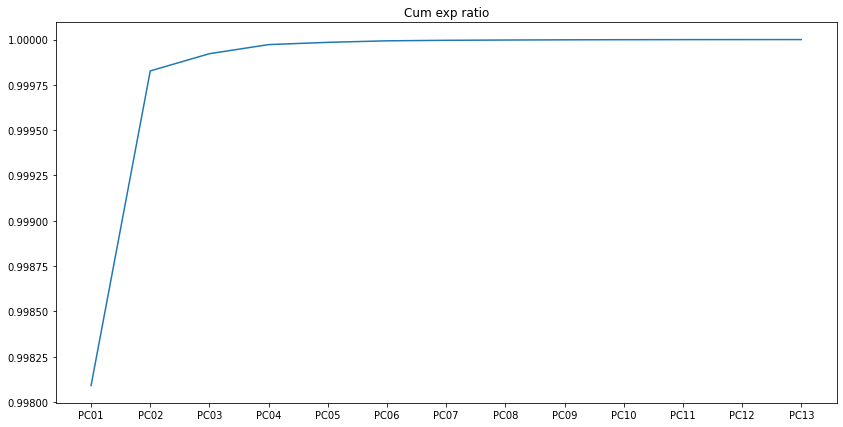

In [ ]:
# 累積寄与度
plt.figure(figsize=(14,7))
plt.plot(exp_ration.cumsum()) 
plt.xticks([i for i in range(len(df.columns))]) 
plt.title('Cum exp ratio')

## 04. 可視化

In [ ]:
#主成分得点に変換
df_pca = pd.DataFrame(pca.transform(df),index=df.index,columns=["PC{0:02}".format(x + 1) for x in range(len(df.columns))])

In [ ]:
#クラス番号を付与する
df_pca['class'] = wine.target

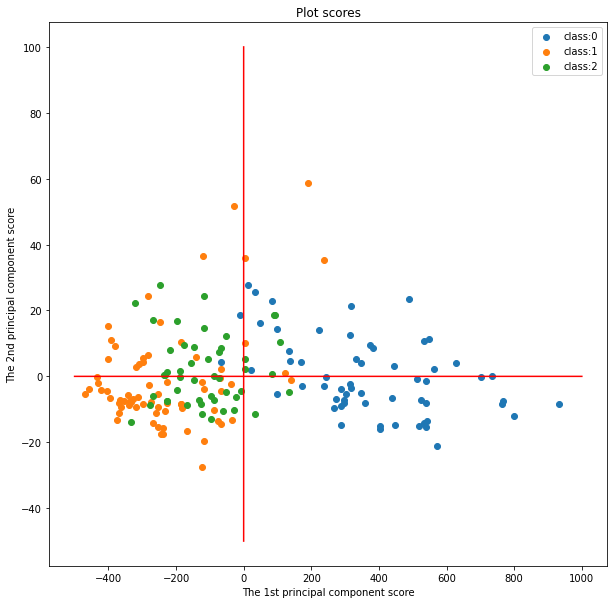

In [ ]:
#主成分得点とクラスの描画
plt.figure(figsize=(10,10))
plt.plot(np.linspace(-500,1000,2000),[0]*2000,color='red')
plt.plot([0]*2000,np.linspace(-50,100,2000),color='red')
for target in df_pca['class'].unique():
  temp = df_pca[df_pca['class']==target]
  plt.scatter(temp['PC01'],temp['PC02'],label='class:'+str(target))
  plt.legend()
  plt.xlabel('The 1st principal component score')
  plt.ylabel('The 2nd principal component score')
  plt.title('Plot scores')

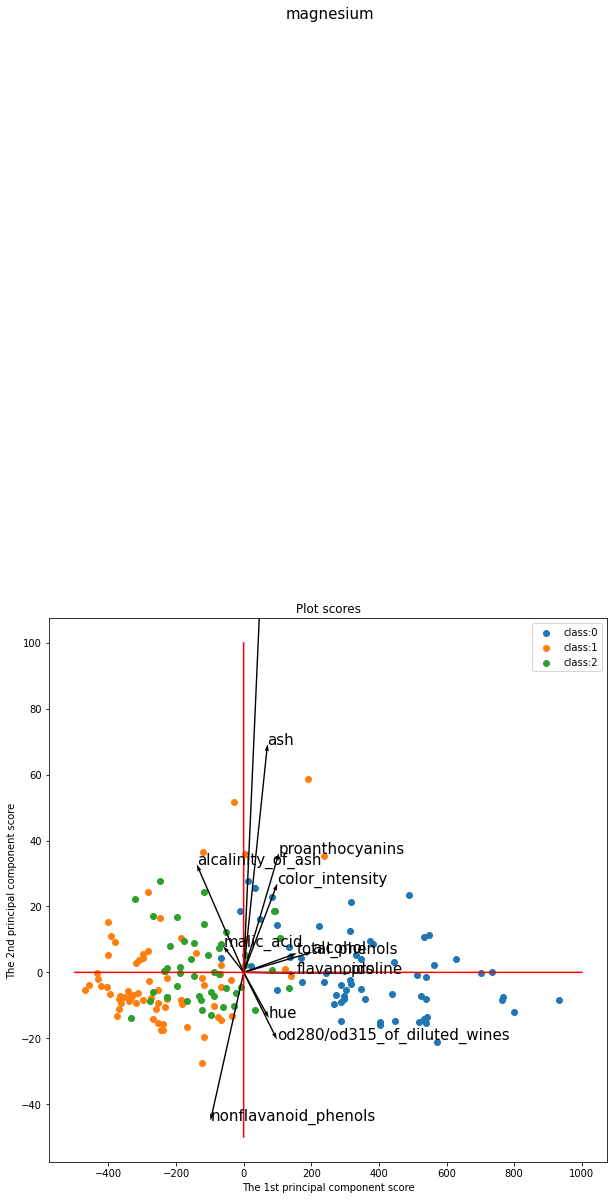

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(-500,1000,2000),[0]*2000,color='red')
plt.plot([0]*2000,np.linspace(-50,100,2000),color='red')
for target in df_pca['class'].unique():
  temp = df_pca[df_pca['class']==target]
  plt.scatter(temp['PC01'],temp['PC02'],label='class:'+str(target))
  plt.legend()
  plt.xlabel('The 1st principal component score')
  plt.ylabel('The 2nd principal component score')
  plt.title('Plot scores')

for i in range(len(df.columns)):
  plt.quiver(0, 0, compo_1[i]*df_pca.std()[0], compo_2[i]*df_pca.std()[0], color = "black",angles = 'xy', scale_units = 'xy', scale = 1,width=0.0025)
  plt.text(compo_1[i]*df_pca.std()[0], compo_2[i]*df_pca.std()[0], compo_1.index[i], color = "black", size = 15)

# plt.quiver(0, 0, compo_1[1]*df_pca.std()[0], compo_2[1]*df_pca.std()[0], color = "black",angles = 'xy', scale_units = 'xy', scale = 1,width=0.0025)
# plt.text(compo_1[1]*df_pca.std()[0], compo_2[1]*df_pca.std()[0], compo_1.index[1], color = "black", size = 15)

# plt.quiver(0, 0, compo_1[1]*np.sqrt(pca.explained_variance_[0]), compo_2[1]*np.sqrt(pca.explained_variance_[0]), color = "black",angles = 'xy', scale_units = 'xy', scale = 1)
# plt.text(compo_1[0]*np.sqrt(pca.explained_variance_[0]), compo_2[0]*np.sqrt(pca.explained_variance_[0]), compo_1.index[0], color = "black", size = 15)

## Appendix 

* 標準化した場合 

  * pca.fitによりpca.componentsには固有ベクトルが格納される。pca.transformでは標準化したデータと固有ベクトルの線形結合で得点を計算
  * pca_compenents_は因子負荷量ではなく、係数（固有ベクトル）であるため因子負荷量に変換するために、重み*√固有値とする必要がある

* 標準化をしなかった場合
  * pca.fitによりpca.componentsには固有ベクトルが格納されるまでは同じであるが。pca.transformでは標準化したデータと固有ベクトルの線形結合で得点を計算するので、np.dot(pca.components,df-df.mean(axis=0))とする必要がある
  * pca_compenents_は因子負荷量ではなく、係数（固有ベクトル）であるのは同じであるが、因子負荷量に変換するために、重み*√固有値 / df.std(axis=0)とする必要がある。

